dict_keys([])
<KeysViewHDF5 ['Data_Fields', 'Geolocation_Time_Fields', 'nchan', 'nchar', 'npixel', 'nscan']>
TB89:  [[264.0186  265.74643 267.00235 ... 280.08322 268.4919  269.0782 ]
 [262.9571  264.5922  266.24786 ... 274.7353  240.06622 263.02972]
 [262.10437 264.29883 265.9745  ... 273.81564 249.4367  262.66266]
 ...
 [248.53531 247.74004 256.6459  ... 275.66296 277.1761  278.45416]
 [248.5032  248.44131 256.1754  ... 269.99988 279.76556 281.7325 ]
 [248.31055 247.78854 254.4559  ... 270.56766 280.6271  277.28738]] (200, 90)
TB157:  [[285.19916 284.77917 284.31897 ... 275.61075 252.47414 242.20392]
 [285.29803 285.77853 284.9927  ... 272.2176  209.43683 236.74936]
 [285.91766 286.232   285.34912 ... 269.11627 231.07031 241.7045 ]
 ...
 [275.20395 274.91513 275.2304  ... 279.94745 278.76743 278.83115]
 [274.16754 273.65717 274.74045 ... 278.1775  279.14236 279.7113 ]
 [274.6769  275.38434 274.96622 ... 277.51074 279.13287 279.16205]] (200, 90)
TB190:  [[273.38788 273.1205  272.0785  

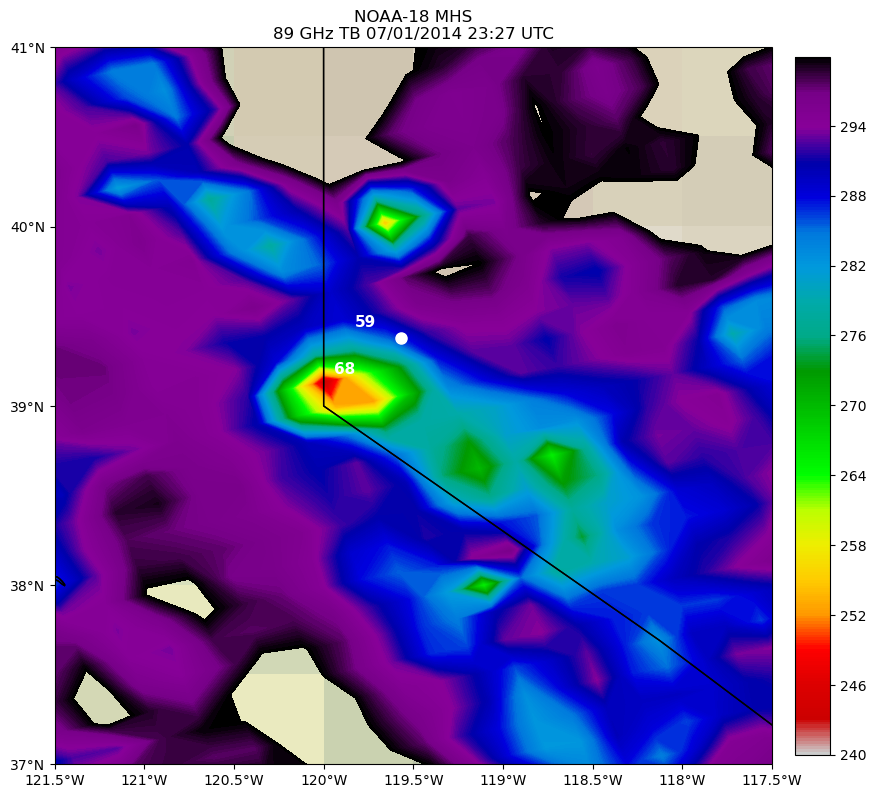

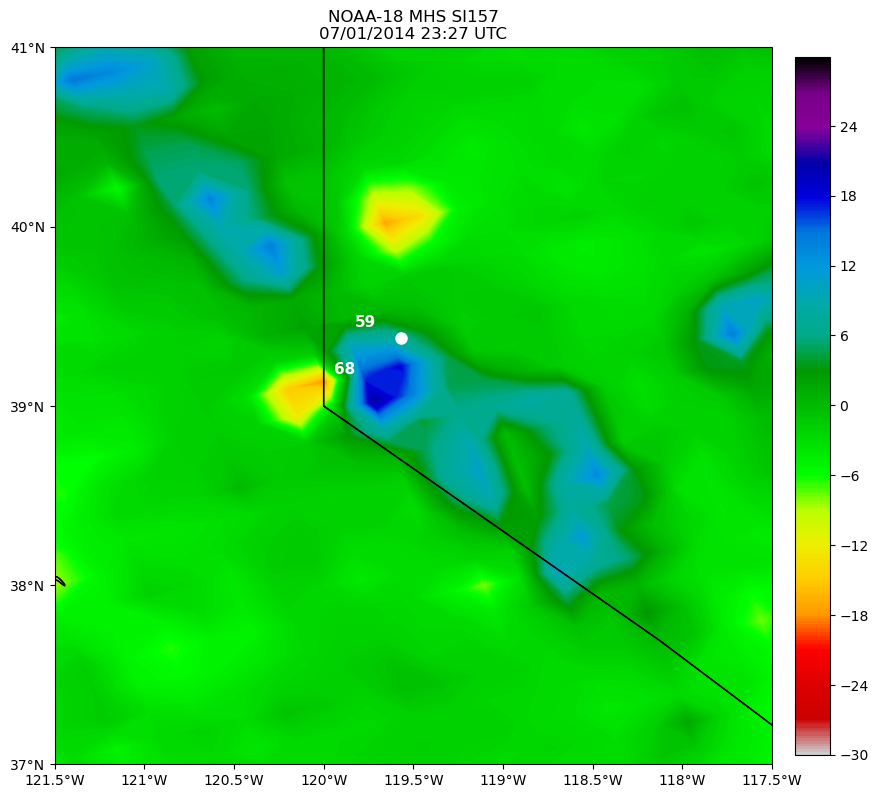

In [16]:
from __future__ import print_function, division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset 
import h5py
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_names(ncf):
    nc_fid = Dataset(ncf, 'r')
    names = nc_fid.variables.keys()
    nc_fid.close()
    return names

ret_file = 'NSS.MHSX.NN.D14182.S2320.E0115.B4696566.GC.nc'
names = read_names(ret_file)
print(names)

# Open file.
FILE_NAME = 'NSS.MHSX.NN.D14182.S2320.E0115.B4696566.GC.nc'
TB89 = 'Data_Fields/fcdr_brightness_temperature_1'
TB157 = 'Data_Fields/fcdr_brightness_temperature_2'
TB190 = 'Data_Fields/fcdr_brightness_temperature_5'
lats = 'Geolocation_Time_Fields/latitude'
lons = 'Geolocation_Time_Fields/longitude'

with h5py.File(FILE_NAME, mode='r') as f:
    # List available datasets.
    print(f.keys())

    # Read dataset.
    tb89 = f[TB89]
    tb89 = tb89[40:240,:]
    print("TB89: ",tb89,tb89.shape)
    tb157 = f[TB157]
    tb157 = tb157[40:240,:]
    print("TB157: ",tb157,tb157.shape)
    tb190 = f[TB190]
    tb190 = tb190[40:240,:]
    print("TB190: ",tb190,tb190.shape)
    lat = f[lats]
    lat = lat[40:240,:]
    print("Latitude: ",lat,lat.shape)
    lon = f[lons]
    lon = lon[40:240,:]
    print("Longitude: ",lon,lon.shape)
   
TB89_mn = np.mean(tb89)
TB157_mn = np.mean(tb157)
TB190_mn = np.mean(tb190)
lat_mn = np.mean(lat)
lon_mn = np.mean(lon)
print("TB89 mean = ", TB89_mn)
print("TB157 mean = ", TB157_mn)
print("TB190 mean = ", TB190_mn)
print("Lats mean= ", lat_mn)
print("Lons mean= ", lon_mn)
TB89_max = np.amax(tb89)
TB89_min = np.amin(tb89)
TB157_max = np.amax(tb157)
TB157_min = np.amin(tb157)
TB190_max = np.amax(tb190)
TB190_min = np.amin(tb190)
print("TB89 max =", TB89_max)
print("TB89 min =", TB89_min)
print("TB89 = ", tb89, tb89.shape)
print("TB157 max =", TB157_max)
print("TB157 min =", TB157_min)
print("TB157 = ", tb157, tb157.shape)
print("TB190 max =", TB190_max)
print("TB190 min =", TB190_min)
print("TB190 = ", tb190, tb190.shape)
print("Lats = ", lat, lat.shape)
print("Lons = ", lon, lon.shape)

SI157 = tb89 - tb157
SI157_max = np.amax(SI157)
SI157_min = np.amin(SI157)
print("SI157 max =", SI157_max)
print("SI157 min =", SI157_min)
print("SI157 = ", SI157, SI157.shape)

fig = plt.figure(figsize=(10, 10))
img_extent = (-121.5, -117.5, 37.5, 41.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-121.5, -117.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('NOAA-18 MHS\n'
          '89 GHz TB 07/01/2014 23:27 UTC')
levels = np.arange(240,300,0.1)
mi = ax.contourf(lon, lat, tb89, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.set_xticks([-121.5,-121,-120.5,-120,-119.5,-119,-118.5,-118,-117.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-119.57, 39.38, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-119.88083, 39.24444, '68', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-119.76819, 39.50776, '59', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_tb89_2327.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-121.5, -117.5, 37.5, 41.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-121.5, -117.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('NOAA-18 MHS SI157\n'
          '07/01/2014 23:27 UTC')
levels = np.arange(-30,30,0.1)
mi = ax.contourf(lon, lat, SI157, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.set_xticks([-121.5,-121,-120.5,-120,-119.5,-119,-118.5,-118,-117.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-119.57, 39.38, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-119.88083, 39.24444, '68', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-119.76819, 39.50776, '59', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_SI157_2327.png",dpi=250,bbox_inches='tight')
plt.show()